# **El algoritmo es correcto**

---

Predecir precios de viviendas en propiedades no horizontales

## Description  📑

> Los expertos de Habi perfeccionan todos los días el algoritmo con el que identifican el valor de los inmuebles pertenecientes a una propiedad horizontal. Sin embargo, los inmuebles que NO hacen parte de una propiedad horizontal aún representan un reto, ya que su valorización depende de determinantes que no considera correctamente su algoritmo actual.



## Evaluation  ✔️


> La métrica de evaluación será el MAPE. En la sección de data pueden encontrar el formato de cómo mandar las predicciones. El valor a predecir es el VALOR METRO CUADRADO, es decir, valor total del inmueble / area.




[MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

## <font color='Red'>Metodologia </font>  📰

El desarrollo de la metodología corresponde a tres fases: Preprocesamiento, Extracción de características y diseño e implementación del modelo. Inicialmente en la primera fase, se realiza una comparación entre la base de datos de entrenamiento y la base de datos testeo con el fin de establecer los rangos de análisis para ejecutar los filtros de los datos de entrenamiento; se establecieron rangos como número de habitaciones menor a 8, por lo menos que una vivienda tenga un garaje, que el tipo de vivienda sea casa, y el tipo de negocio sea venta, etc. Luego de establecer estos rangos, se realizan los filtros de los rangos en la base de datos de entrenamiento. Posteriormente, se efectúa la imputación de los datos faltantes; algunos faltantes son eliminados y otros son estimados. A partir de este resultado, se eliminan los datos atípicos de los datos de entrenamiento; a través de visualización se consideraron precios de venta aceptables. Una vez se tiene la base de datos preprocesada, se ejecuta la fase de extracción y selección de características, donde se extrae la variable precio de venta sobre metro cuadrado (PV/A) y se aplican tres metodologías de selección de características importante (Mutual information). El resultado de esta fase de extracción es el establecimiento de las características más relevantes sobre el PV/A, que posteriormente, se utiliza como input de algoritmo no supervisado. A continuación, se procede con la fase de diseño e implementación del modelo. Durante esta fase, se parte de la realización de un filtro de la base de datos de entrenamiento donde se establezcan las casas más similares a la casa objetivo (sobre la cual se desea estimar el precio) basados en las características relevantes (área, estrato y habitaciones). Una vez se tiene este filtro, se realiza la selección de los vecinos más cercanos según localización (latitud y longitud) a la casa objetivo. Si el resultado de este proceso obtiene menos de dos vecinos, se realiza nuevamente el proceso de filtrado, pero de forma suavizada; en este caso no se filtra por número de habitaciones y se eliminan datos extremos de PVA. Finalmente, se determina la mediana del precio en los vecinos más cercanos y se establece un precio de descuento por cada estrato. Este valor resultante de la aplicación del descuento a la mediana de los vecinos es el valor predicho.

![alt text](https://raw.githubusercontent.com/kvnpalm/EL-ALGORITMO-ES-CORRECTO/main/metodologia_habi.png)



# Tabla de contenido

* [1. Importar librerias necesarias 📚](#1)
* [2. Limpieza y Preparación de los datos 🔧](#2)
* [3. Visualización de los datos 🎨](#3)
* [4. Extracción de Caracteristicas 🔍](#4)
* [5. Modelo Base📝](#5)
* [6. Random Forest 📝](#6)
* [7. Clustering 📝](#8)


# 1. Importar librerias necesarias  📚




In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install -U pandas-profiling[notebook]
from pandas_profiling import ProfileReport 
import seaborn as sns
from google.colab import drive
drive.mount("/gdrive") 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from tensorflow import keras
from tensorflow.keras import layers
import plotly.figure_factory as ff
import sklearn
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn import neighbors
import folium
import branca.colormap as cm
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

Requirement already up-to-date: pandas-profiling[notebook] in /usr/local/lib/python3.7/dist-packages (2.11.0)
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [81]:
%cd "/gdrive/Shareddrives/KAGGLE/DATA"

/gdrive/Shareddrives/KAGGLE/DATA


# 2. Limpieza y Preparación de los datos 🔧

## 2.1 Lectura de datos 

In [3]:
data_train=pd.read_csv("train_data.csv")
data_test=pd.read_csv("test_data.csv")
data_train.head()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,estudio,garajes,gimnasio,habitaciones,halldealcobas,parqueaderovisitantes,piscina,piso,porteria,remodelado,saloncomunal,terraza,tiempodeconstruido,vigilancia,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud
0,1205404,55.0,NaN,NaN,NaN,NaN,0,NaN,1.0,3.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,50000.0,1.699500e+08,Casa,Venta,4.560965,-74.094889
1,1204371,43.0,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.000000e+07,Casa,Venta,4.576960,-74.100083
2,1125353,360.0,NaN,NaN,NaN,NaN,0,NaN,0.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.100000e+09,Casa,Venta,4.575000,-74.101000
3,1125506,60.0,NaN,NaN,NaN,1.0,0,1.0,0.0,3.0,NaN,NaN,0.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.600000e+08,Apartamento,Venta,4.575924,-74.108039
4,1204569,72.0,NaN,NaN,NaN,NaN,0,NaN,0.0,2.0,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.250000e+08,Casa,Venta,4.559000,-74.097000


In [4]:
#cantidad de datos
len_data=len(data_train)
print("data test: ",len(data_test))
print("data train: ",len(data_train))

data test:  53
data train:  244488


In [5]:
# Valores unicos para el training
for col in data_train.columns:
    print(f"{col}: {len(data_train[col].unique())}")

id: 244488
area: 7621
ascensor: 2
balcon: 2
banos: 34
banoservicio: 2
conjuntocerrado: 2
cuartoservicio: 2
deposito: 3
estrato: 9
estudio: 3
garajes: 12
gimnasio: 3
habitaciones: 41
halldealcobas: 2
parqueaderovisitantes: 3
piscina: 2
piso: 31
porteria: 2
remodelado: 2
saloncomunal: 2
terraza: 2
tiempodeconstruido: 12
vigilancia: 3
vista: 3
zonalavanderia: 2
valoradministracion: 6244
valorventa: 17893
tipoinmueble: 2
tiponegocio: 5
latitud: 160736
longitud: 97356


In [6]:
# Valores unicos para el testing
for col in data_test.columns:
    print(f"{col}: {len(data_test[col].unique())}")

id: 53
area: 10
ascensor: 1
balcon: 2
banos: 3
banoservicio: 1
conjuntocerrado: 1
cuartoservicio: 2
deposito: 2
estrato: 4
estudio: 2
garajes: 2
gimnasio: 1
habitaciones: 4
halldealcobas: 2
parqueaderovisitantes: 2
piscina: 1
piso: 4
porteria: 1
remodelado: 1
saloncomunal: 2
terraza: 2
tiempodeconstruido: 5
vigilancia: 2
vista: 2
zonalavanderia: 2
valoradministracion: 4
valorventa: 27
tipoinmueble: 1
tiponegocio: 1
latitud: 50
longitud: 50


Inicialmente, se nota que la base de datos testing y training **no estan balanceadas** (Ejemplo: en el testing solo se encuentra un tipo de negocio e imnmueble, mientras que en el training se encuentra 5 tipos de negocios y 2 tipos de inmueble). Procederemos a analizar en más detalle esta  afirmación.

##  2.2 Comparación train vs test 

### 2.2.1 Variables categóricas 

In [7]:
#valores categoricos training
print("TRAIN")
s=[print("La variable " + name + " tiene como valores unicos: \n"+ ", ".join(map(str,data_train[name].unique())),"\n") 
for name in list(data_train.select_dtypes(include='object').columns)]

TRAIN
La variable tiempodeconstruido tiene como valores unicos: 
nan, Entre 10 y 20 años, Entre 0 y 5 años, Entre 5 y 10 años, Más de 20 años, 1 a 8 años, 16 a 30 años, 9 a 15 años, Más de 30 años, Menos de 1 año, Remodelado, ntre 0 y 5 años 

La variable vista tiene como valores unicos: 
nan, Exterior, Interior 

La variable tipoinmueble tiene como valores unicos: 
Casa, Apartamento 

La variable tiponegocio tiene como valores unicos: 
Venta, Venta y arriendo, Arriendo, Venta Y Arriendo, nan 



In [8]:
data_train.describe(include=[object])

,tiempodeconstruido,vista,tipoinmueble,tiponegocio
count,183910,102132,244488,243718
unique,11,2,2,4
top,Entre 10 y 20 años,Exterior,Apartamento,Venta
freq,35301,79975,186762,232546


In [9]:
#valores categoricos testing
print("TEST")
s=[print("La variable " + name + " tiene como valores unicos: \n"+ ", ".join(map(str,data_test[name].unique())),"\n") 
for name in list(data_test.select_dtypes(include='object').columns)]

TEST
La variable tiempodeconstruido tiene como valores unicos: 
9 a 15 años, 1 a 8 años, Entre 10 y 20 años, 16 a 30 años, Más de 20 años 

La variable vista tiene como valores unicos: 
nan, Exterior 

La variable tipoinmueble tiene como valores unicos: 
Casa 

La variable tiponegocio tiene como valores unicos: 
Venta 



In [10]:
data_test.describe(include=[object])

,tiempodeconstruido,vista,tipoinmueble,tiponegocio
count,53,2,53,53
unique,5,1,1,1
top,9 a 15 años,Exterior,Casa,Venta
freq,24,2,53,53


Notamos que  algunas clases de las variables categoricas en el set de datos del test solo cuenta con una categorias. Ejemplo: tipoimueble, solo tiene categoria casas; tiponegocio, solo ventas.

###  2.2.2 Variables númericas 

In [11]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,244488.0,6.017399e+05,4.054039e+05,6.000000e+00,2.831318e+05,5.290635e+05,9.057762e+05,6.262945e+06
area,244110.0,1.654388e+04,6.307177e+06,0.000000e+00,6.900000e+01,1.050000e+02,1.840000e+02,3.003515e+09
ascensor,87672.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
balcon,60181.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
banos,243049.0,2.795025e+00,1.662945e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.530000e+02
banoservicio,12231.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
conjuntocerrado,244488.0,3.192018e-01,4.661683e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
cuartoservicio,55492.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
deposito,107413.0,8.733394e-01,3.325940e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
estrato,236806.0,4.402790e+00,1.322203e+00,0.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00


In [12]:
data_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,53.0,6.960469e+05,3.584821e+05,7.862200e+04,4.249850e+05,6.306310e+05,9.398430e+05,1.368608e+06
area,53.0,1.534717e+02,2.887613e+01,1.040000e+02,1.440000e+02,1.450000e+02,1.500000e+02,2.300000e+02
ascensor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balcon,14.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
banos,53.0,2.792453e+00,6.311921e-01,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
banoservicio,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
conjuntocerrado,53.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cuartoservicio,7.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
deposito,27.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
estrato,53.0,3.094340e+00,4.499637e-01,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00


Notamos que algunas variable en el test no cuentan con observaciones, tales como: remodelado,porteria,piscina, gimnasio, bano de servicio y ascensor. Adicionalmente, notamos rango diferentes de las variables entre los datos de testing y training(Ejemplo:  Número de habitaciones).

##  2.3 Filtros 

> Con base a los resultandos anteriores, notamos datos atipicos (ejemplo: Area de casa igual cero), por lo tanto teniendo en cuenta los rangos en los que se mueven las variables del testing filtraremos el training.

In [13]:
# Quitar valores nullos y ceros del area de la casa
data_train=data_train[data_train["area"]!=0]
data_train=data_train[data_train["area"].isnull()==False]
print("-----------------------------------")
print("Tamaño original de datos: ", len_data)
print("Nuevo tamaños de datos training: ",len(data_train))
print("Porcentaje de disminución:", (1-len(data_train)/len_data)*100)
print("-----------------------------------")
data_train.isnull().sum()

-----------------------------------
Tamaño original de datos:  244488
Nuevo tamaños de datos training:  243606
Porcentaje de disminución: 0.3607539020319961
-----------------------------------


id                            0
area                          0
ascensor                 156336
balcon                   183659
banos                      1396
banoservicio             231383
conjuntocerrado               0
cuartoservicio           188242
deposito                 136204
estrato                    7319
estudio                  167105
garajes                   31255
gimnasio                 171021
habitaciones                711
halldealcobas            179187
parqueaderovisitantes    183877
piscina                  226076
piso                     118802
porteria                 224777
remodelado               220521
saloncomunal             134853
terraza                  201017
tiempodeconstruido        60194
vigilancia               100895
vista                    141584
zonalavanderia            95799
valoradministracion       28093
valorventa                    0
tipoinmueble                  0
tiponegocio                 769
latitud                       0
longitud

In [14]:
# filtros para el train dado el testing

train_data=data_train.query("tipoinmueble=='Casa' and tiponegocio == 'Venta' and conjuntocerrado==0  and area <250 and area >100 and habitaciones<=8 and garajes >0  ",).copy()
print("-----------------------------------")
print("Tamaño original de datos: ", len_data)
print("Nuevo tamaños de datos training: ",len(train_data))
print("Porcentaje de disminución:", round((1-len(train_data)/len_data)*100,2),"%")
print("-----------------------------------")


-----------------------------------
Tamaño original de datos:  244488
Nuevo tamaños de datos training:  13550
Porcentaje de disminución: 94.46 %
-----------------------------------


In [15]:
train_data.isnull().sum()

id                           0
area                         0
ascensor                 13493
balcon                   12242
banos                       24
banoservicio             12519
conjuntocerrado              0
cuartoservicio            9833
deposito                  8078
estrato                    250
estudio                   9753
garajes                      0
gimnasio                 10215
habitaciones                 0
halldealcobas            10121
parqueaderovisitantes    12483
piscina                  13424
piso                      9824
porteria                 13380
remodelado               13244
saloncomunal             12198
terraza                  11173
tiempodeconstruido        4007
vigilancia               11306
vista                    10084
zonalavanderia            6195
valoradministracion       2525
valorventa                   0
tipoinmueble                 0
tiponegocio                  0
latitud                      0
longitud                     0
dtype: i

In [16]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,13550.0,7.526378e+05,5.187941e+05,4.800000e+01,4.033178e+05,7.017520e+05,1.101400e+06,6.262945e+06
area,13550.0,1.778034e+02,4.150330e+01,1.004000e+02,1.440000e+02,1.800000e+02,2.150000e+02,2.497500e+02
ascensor,57.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
balcon,1308.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
banos,13526.0,3.242126e+00,2.696311e+00,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.530000e+02
banoservicio,1031.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
conjuntocerrado,13550.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cuartoservicio,3717.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
deposito,5472.0,6.546053e-01,4.755403e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
estrato,13300.0,3.584361e+00,1.084183e+00,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00


In [17]:
#Resetiamos el index
train_data.reset_index(inplace=True,drop=True)

In [18]:
#Seleccionamos variables según la comparación
train_data=train_data[['area','balcon', 'banos', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes',  'habitaciones', 'halldealcobas','parqueaderovisitantes','piso', 'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 
       'zonalavanderia', 'latitud', 'longitud','valorventa']]
train_data.head()

,area,balcon,banos,cuartoservicio,deposito,estrato,estudio,garajes,habitaciones,halldealcobas,parqueaderovisitantes,piso,saloncomunal,terraza,tiempodeconstruido,vigilancia,zonalavanderia,latitud,longitud,valorventa
0,182.0,NaN,NaN,NaN,0.0,2.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.622881,-74.178174,270000000.0
1,174.0,NaN,NaN,NaN,0.0,3.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.677401,-74.101916,700000000.0
2,196.0,NaN,NaN,1.0,1.0,4.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.669190,-74.124060,750000000.0
3,200.0,NaN,NaN,1.0,0.0,5.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.647345,-74.072601,980000000.0
4,150.0,1.0,NaN,NaN,1.0,4.0,NaN,3.0,3.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,4.730382,-74.029850,750650000.0


##  2.4 Imputación 

Dado a la descripción de las variables predictoras donde algunas variables toma valores 0 y 1, notamos que algunas variables del train solo muestra solo el valor de 1. Entonces, suponemos que los valores NA's son valores asociados a 0. 

In [19]:
# Lleganos las variables con nas como cero
train_data[['balcon', 'cuartoservicio', 'deposito', 'estudio','halldealcobas',
       'parqueaderovisitantes', 'saloncomunal', 'terraza', 'vigilancia', 'zonalavanderia']]=train_data[['balcon', 'cuartoservicio', 'deposito', 'estudio','halldealcobas',
       'parqueaderovisitantes', 'saloncomunal', 'terraza', 'vigilancia', 'zonalavanderia']].fillna(0)
train_data.head()

,area,balcon,banos,cuartoservicio,deposito,estrato,estudio,garajes,habitaciones,halldealcobas,parqueaderovisitantes,piso,saloncomunal,terraza,tiempodeconstruido,vigilancia,zonalavanderia,latitud,longitud,valorventa
0,182.0,0.0,NaN,0.0,0.0,2.0,0.0,1.0,3.0,0.0,0.0,NaN,0.0,1.0,NaN,0.0,0.0,4.622881,-74.178174,270000000.0
1,174.0,0.0,NaN,0.0,0.0,3.0,0.0,2.0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,4.677401,-74.101916,700000000.0
2,196.0,0.0,NaN,1.0,1.0,4.0,0.0,2.0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,1.0,4.669190,-74.124060,750000000.0
3,200.0,0.0,NaN,1.0,0.0,5.0,0.0,1.0,5.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,4.647345,-74.072601,980000000.0
4,150.0,1.0,NaN,0.0,1.0,4.0,0.0,3.0,3.0,0.0,1.0,NaN,1.0,1.0,NaN,0.0,1.0,4.730382,-74.029850,750650000.0


In [20]:
train_data.isnull().sum()

area                        0
balcon                      0
banos                      24
cuartoservicio              0
deposito                    0
estrato                   250
estudio                     0
garajes                     0
habitaciones                0
halldealcobas               0
parqueaderovisitantes       0
piso                     9824
saloncomunal                0
terraza                     0
tiempodeconstruido       4007
vigilancia                  0
zonalavanderia              0
latitud                     0
longitud                    0
valorventa                  0
dtype: int64

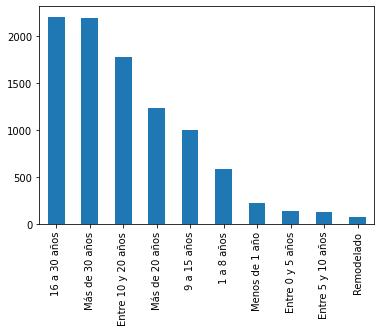

In [21]:
train_data.tiempodeconstruido.value_counts().plot(kind='bar')

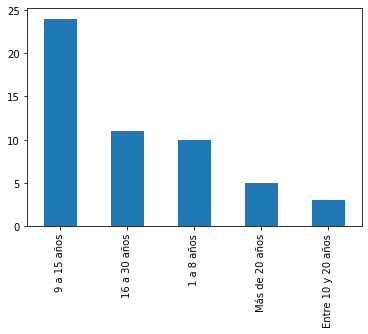

In [22]:
data_test.tiempodeconstruido.value_counts().plot(kind='bar')

Dado a que la variables tiempo de construido es una variable muy complicado de predecir, procedemos a asignar el tiempo de contrucción de la casas aledaña para verificar. Usaremos KNN para revisar los vecinos mas cercanos.

In [23]:
#Knn
lalonde_df2=train_data.copy()
lalonde_df2["treat"]=0
tc=[]
control_pscores = lalonde_df2[lalonde_df2["tiempodeconstruido"].isnull()== True].copy()
treat_pscores = lalonde_df2[lalonde_df2["tiempodeconstruido"].isnull()!= True].copy()
control_pscores.reset_index(inplace=True,drop=True)
treat_pscores.reset_index(inplace=True,drop=True)
V=1
for i in range(len(control_pscores)):
  lalonde_df4 = treat_pscores.copy()  
  knn = neighbors.NearestNeighbors(n_neighbors=V,metric='euclidean')
  knn.fit(lalonde_df4[["latitud","longitud"]],lalonde_df4["treat"])
  distances, indices = knn.kneighbors(pd.DataFrame(control_pscores[["latitud","longitud"]].iloc[i,:]).transpose())
  treat_pscores12 = lalonde_df4.iloc[indices[0,:]]
  print(" ")
  print('--------------------------------------------------------------------')
  print("Vecino mas cercano")
  print(treat_pscores12[["area","estrato","tiempodeconstruido","latitud","longitud","valorventa"]])
  print("Dato nulo")
  
  print(pd.DataFrame(control_pscores[["area","estrato","tiempodeconstruido","latitud","longitud","valorventa"]].iloc[i,:]).transpose())
  print('--------------------------------------------------------------------')
  tc.append(treat_pscores12.tiempodeconstruido.values[0])

Streaming output truncated to the last 5000 lines.
2116  170.0      4.0     Más de 30 años    4.673 -74.109001  545000000.0
Dato nulo
     area estrato tiempodeconstruido  latitud longitud valorventa
3451  142       4                NaN  4.67304 -74.1091    5.5e+08
--------------------------------------------------------------------
 
--------------------------------------------------------------------
Vecino mas cercano
       area  estrato tiempodeconstruido  latitud   longitud   valorventa
2116  170.0      4.0     Más de 30 años    4.673 -74.109001  545000000.0
Dato nulo
     area estrato tiempodeconstruido  latitud longitud valorventa
3452  145       4                NaN  4.67321  -74.109    5.5e+08
--------------------------------------------------------------------
 
--------------------------------------------------------------------
Vecino mas cercano
       area  estrato tiempodeconstruido   latitud   longitud   valorventa
5130  142.0      4.0       16 a 30 años  4.672813 -74.

In [24]:
#Remplazamos datos nulos
ind_inpu=train_data[train_data.tiempodeconstruido.isnull()].index
train_data.iloc[ind_inpu,14]=tc

In [25]:
train_data.isnull().sum()

area                        0
balcon                      0
banos                      24
cuartoservicio              0
deposito                    0
estrato                   250
estudio                     0
garajes                     0
habitaciones                0
halldealcobas               0
parqueaderovisitantes       0
piso                     9824
saloncomunal                0
terraza                     0
tiempodeconstruido          0
vigilancia                  0
zonalavanderia              0
latitud                     0
longitud                    0
valorventa                  0
dtype: int64

In [26]:
#Knn
lalonde_df2=train_data.copy()
lalonde_df2["treat"]=0
tc2=[]
control_pscores = lalonde_df2[lalonde_df2["estrato"].isnull()== True].copy()
treat_pscores = lalonde_df2[lalonde_df2["estrato"].isnull()!= True].copy()
control_pscores.reset_index(inplace=True,drop=True)
treat_pscores.reset_index(inplace=True,drop=True)
V=1
for i in range(len(control_pscores)):
  lalonde_df4 = treat_pscores.copy()  
  knn = neighbors.NearestNeighbors(n_neighbors=V,metric='euclidean')
  knn.fit(lalonde_df4[["latitud","longitud"]],lalonde_df4["treat"])
  distances, indices = knn.kneighbors(pd.DataFrame(control_pscores[["latitud","longitud"]].iloc[i,:]).transpose())
  treat_pscores12 = lalonde_df4.iloc[indices[0,:]]
  print(" ")
  print('--------------------------------------------------------------------')
  print("Vecino mas cercano")
  print(treat_pscores12[["area","estrato","tiempodeconstruido","latitud","longitud","valorventa"]])
  print("Dato nulo")
  
  print(pd.DataFrame(control_pscores[["area","estrato","tiempodeconstruido","latitud","longitud","valorventa"]].iloc[i,:]).transpose())
  print('--------------------------------------------------------------------')
  tc2.append(treat_pscores12.estrato.values[0])

 
--------------------------------------------------------------------
Vecino mas cercano
        area  estrato tiempodeconstruido   latitud   longitud   valorventa
12995  220.0      4.0         1 a 8 años  4.669505 -74.121155  850000000.0
Dato nulo
  area estrato tiempodeconstruido  latitud longitud valorventa
0  180     NaN         1 a 8 años  4.66919 -74.1211    8.5e+08
--------------------------------------------------------------------
 
--------------------------------------------------------------------
Vecino mas cercano
       area  estrato tiempodeconstruido   latitud   longitud    valorventa
3290  145.0      5.0         1 a 8 años  4.626856 -74.061603  1.100711e+09
Dato nulo
  area estrato tiempodeconstruido  latitud longitud   valorventa
1  145     NaN         1 a 8 años  4.62686 -74.0616  1.10071e+09
--------------------------------------------------------------------
 
--------------------------------------------------------------------
Vecino mas cercano
        area  es

In [27]:
#Remplazamos datos nulos
ind_inpu2=train_data[train_data.estrato.isnull()].index
train_data.iloc[ind_inpu2,5]=tc2


In [28]:
train_data.isnull().sum()

area                        0
balcon                      0
banos                      24
cuartoservicio              0
deposito                    0
estrato                     0
estudio                     0
garajes                     0
habitaciones                0
halldealcobas               0
parqueaderovisitantes       0
piso                     9824
saloncomunal                0
terraza                     0
tiempodeconstruido          0
vigilancia                  0
zonalavanderia              0
latitud                     0
longitud                    0
valorventa                  0
dtype: int64

#3. Visualización  🎨

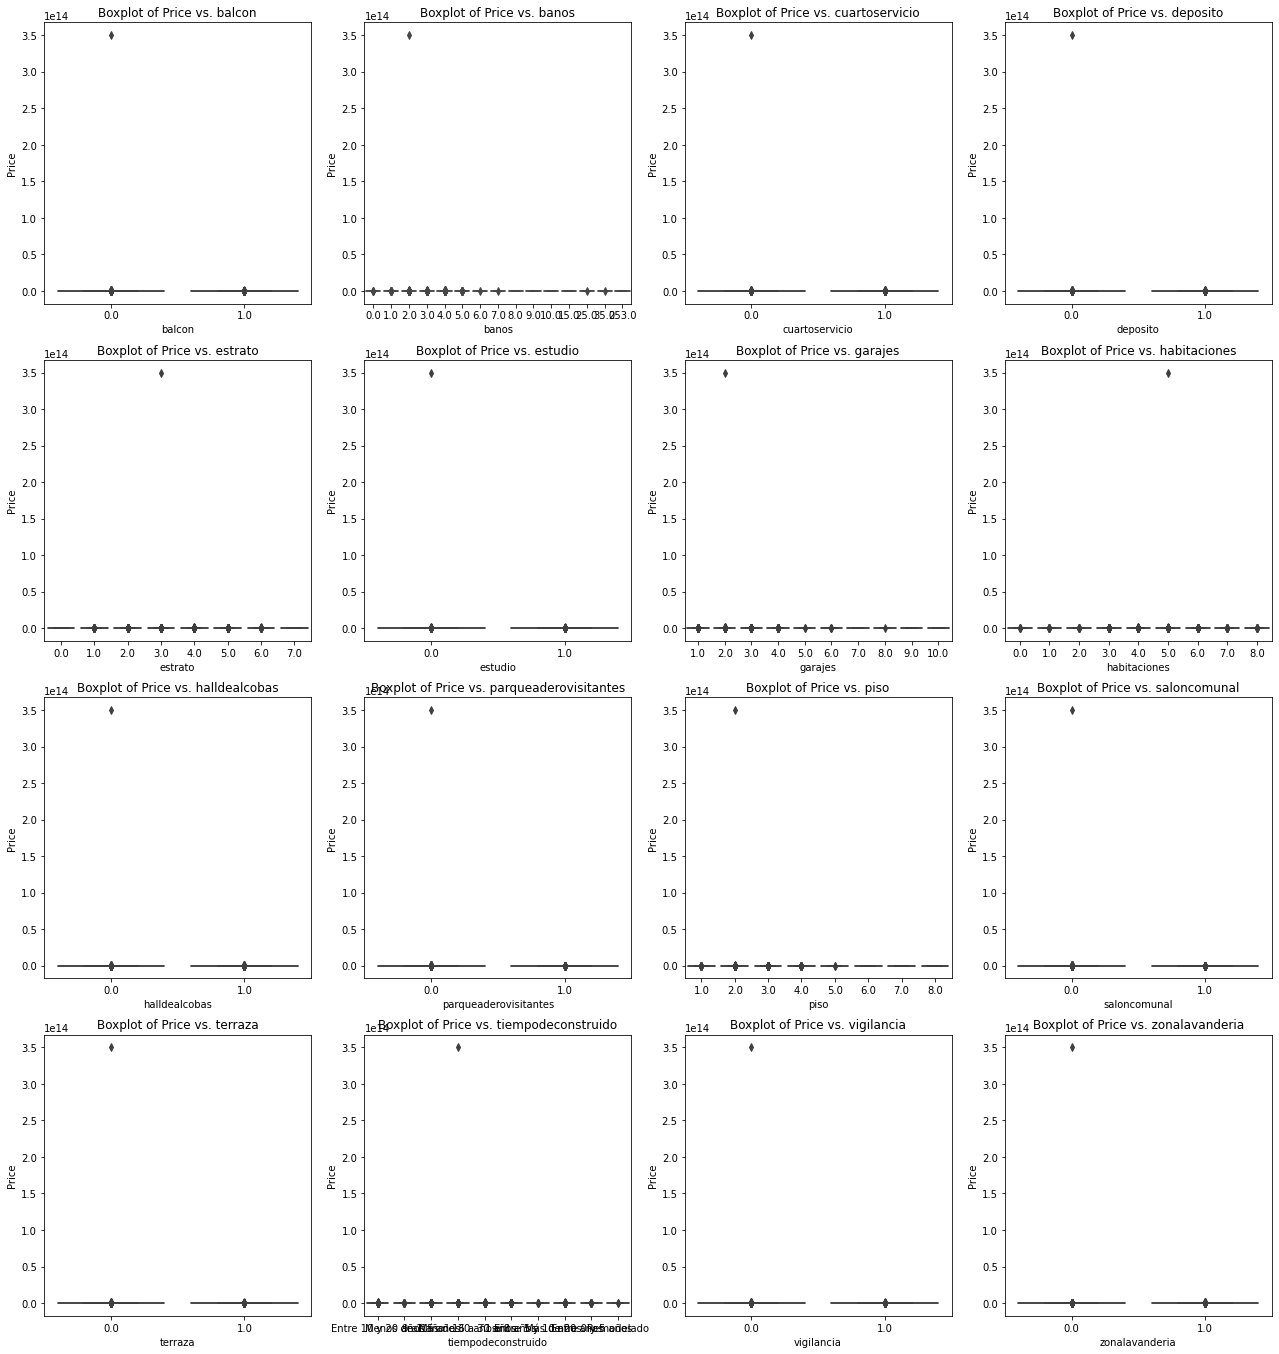

In [29]:
# variables discretas
plt.figure(figsize=(22,30))
vars_to_plot = ['balcon', 'banos', 'cuartoservicio', 'deposito', 'estrato',
       'estudio', 'garajes', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piso', 'saloncomunal', 'terraza',
       'tiempodeconstruido', 'vigilancia', 'zonalavanderia']
for i, var in enumerate(vars_to_plot):
    plt.subplot(5,4,i+1)
    sns.boxplot(x = var, y='valorventa', data = train_data)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

Notamos datos atípicos en el valor de venta de una vivienda. Entonces, antes de seguir con la visualización primero eliminaremos los outlayer. 

### <font color='red'> 3.1 Outlayers </font> 

Notamos que hay valores outlayers para el precio de venta. Procederemos a eliminar este outlayers.

In [30]:
data_test.valorventa.max()*1.20

1116000000.0

In [31]:

train_data=train_data.query("valorventa < 1116000000")
print("-----------------------------------")
print("Tamaño original de datos: ", len_data)
print("Nuevo tamaños de datos training: ",len(train_data))
print("Porcentaje de disminución:", (1-len(train_data)/len_data)*100)
print("-----------------------------------")


-----------------------------------
Tamaño original de datos:  244488
Nuevo tamaños de datos training:  12615
Porcentaje de disminución: 94.84023755767154
-----------------------------------


In [32]:
train_data=train_data.query("estrato < 6 and estrato >1")
print("-----------------------------------")
print("Tamaño original de datos: ", len_data)
print("Nuevo tamaños de datos training: ",len(train_data))
print("Porcentaje de disminución:", (1-len(train_data)/len_data)*100)
print("-----------------------------------")

-----------------------------------
Tamaño original de datos:  244488
Nuevo tamaños de datos training:  12098
Porcentaje de disminución: 95.05169987893066
-----------------------------------


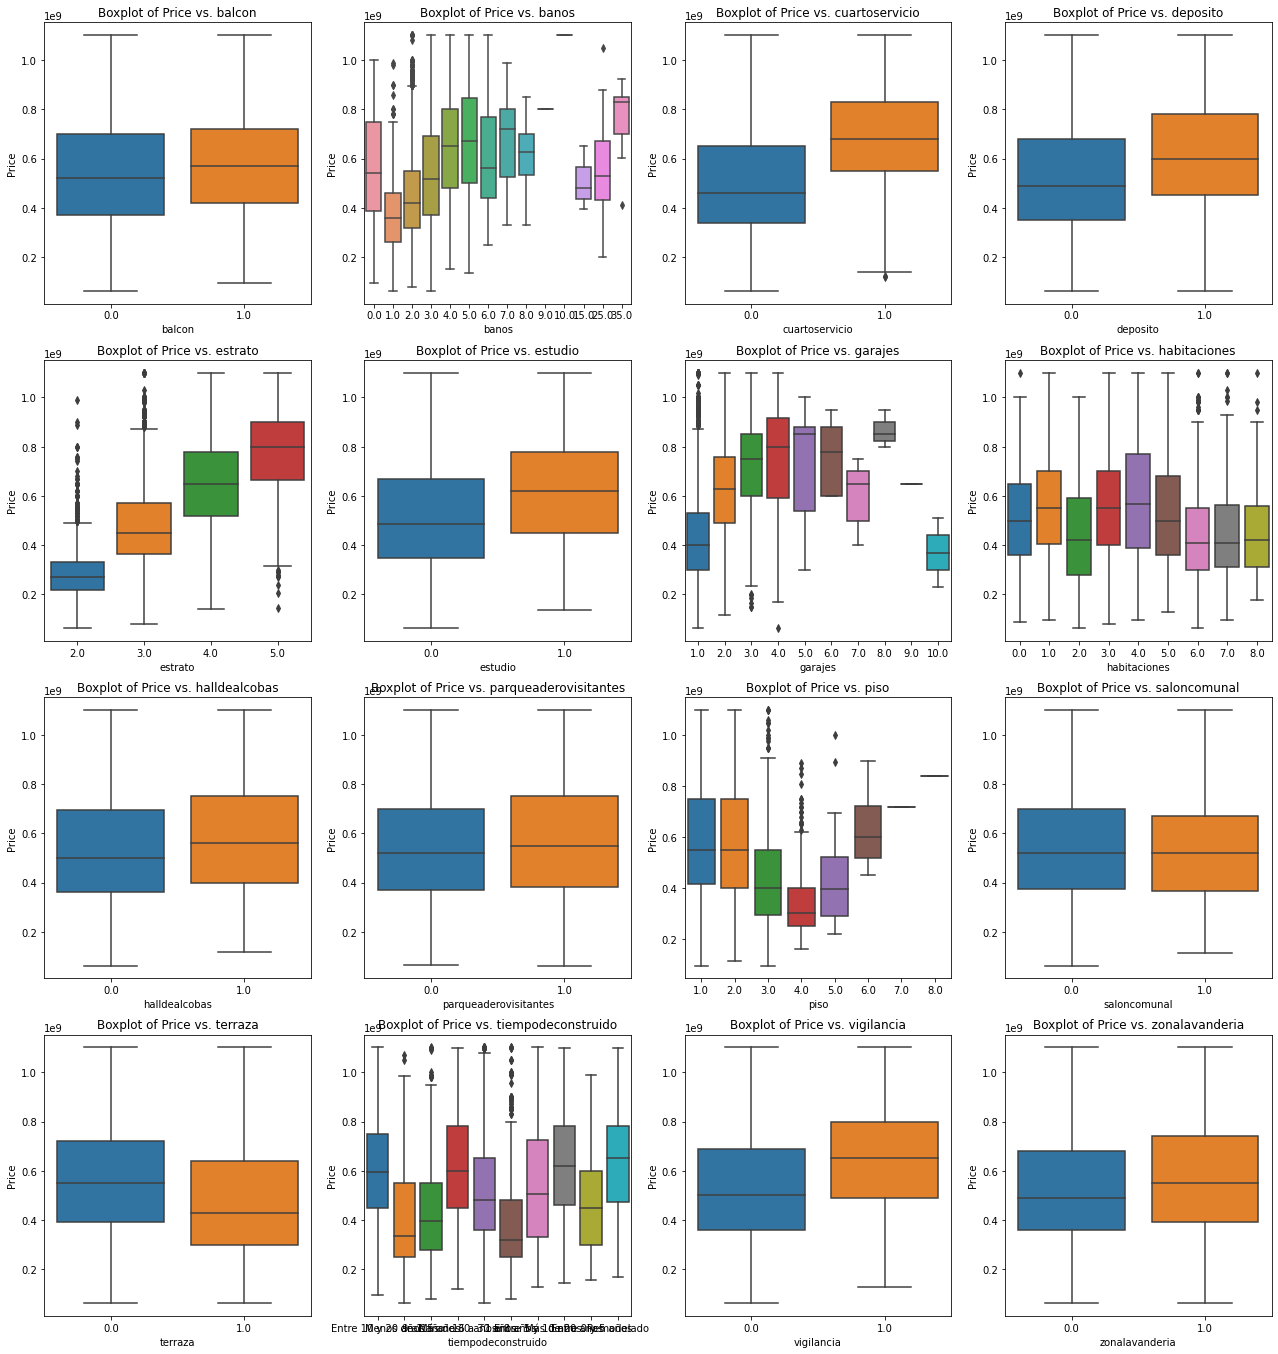

In [33]:
# variables discretas
plt.figure(figsize=(22,30))
vars_to_plot = ['balcon', 'banos', 'cuartoservicio', 'deposito', 'estrato',
       'estudio', 'garajes', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piso', 'saloncomunal', 'terraza',
       'tiempodeconstruido', 'vigilancia', 'zonalavanderia']
for i, var in enumerate(vars_to_plot):
    plt.subplot(5,4,i+1)
    sns.boxplot(x = var, y='valorventa', data = train_data)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Price")
    plt.title(title_string)

Parece ser que al menos una de las clases de las variables (tiempo de construido, piso, estrato, garaje) es diferente para los precios de ventas promedios. 

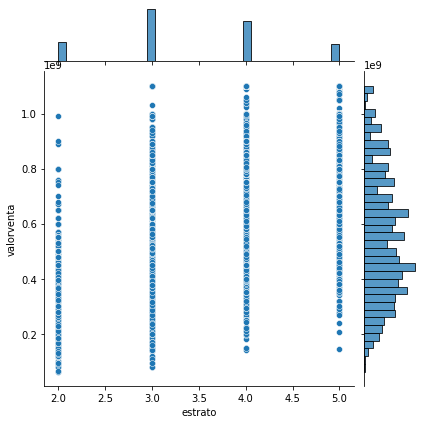

In [34]:
sns.jointplot(x = 'estrato', y = "valorventa", data = train_data)

In [35]:


# Add histogram data
x1 = train_data[train_data.estrato==2].valorventa/10000000
x2 = train_data[train_data.estrato==3].valorventa/10000000
x3 = train_data[train_data.estrato==4].valorventa/10000000
x4 = train_data[train_data.estrato==5].valorventa/10000000

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=1)
fig.show()

Notamos que el estrato descriptivamente es un variable muy importante para agrupar  valores de casa promedios.

## <font color='red'> 3.2 Codificación </font> 

In [36]:
c = train_data["tiempodeconstruido"].astype('category')

d = dict(enumerate(c.cat.categories))
print (d)


{0: '1 a 8 años', 1: '16 a 30 años', 2: '9 a 15 años', 3: 'Entre 0 y 5 años', 4: 'Entre 10 y 20 años', 5: 'Entre 5 y 10 años', 6: 'Menos de 1 año', 7: 'Más de 20 años', 8: 'Más de 30 años', 9: 'Remodelado'}


In [37]:
#codificacion de varibales categoricas para el training
train_data["tiempodeconstruido"] = train_data["tiempodeconstruido"].astype('category')
train_data["tiempodeconstruido"]=train_data["tiempodeconstruido"].cat.codes

In [38]:
#codificacion de varibales categoricas para el testing

data_test=data_test[['id','area','balcon', 'banos', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes',  'habitaciones', 'halldealcobas','parqueaderovisitantes','piso', 'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 
       'zonalavanderia',  'latitud', 'longitud','valorventa']]
data_test[['balcon', 'cuartoservicio', 'deposito', 'estudio','halldealcobas',
       'parqueaderovisitantes', 'saloncomunal', 'terraza', 'vigilancia', 'zonalavanderia']]=data_test[['balcon', 'cuartoservicio', 'deposito', 'estudio','halldealcobas',
       'parqueaderovisitantes', 'saloncomunal', 'terraza', 'vigilancia','zonalavanderia']].fillna(0)
data_test['piso']=data_test['piso'].fillna(1)    



In [39]:
dict_tiempo= dict((val, key) for key, val in d.items())
data_test["tiempodeconstruido"]=data_test["tiempodeconstruido"].map(dict_tiempo)

In [40]:
dict_tiempo

{'1 a 8 años': 0,
 '16 a 30 años': 1,
 '9 a 15 años': 2,
 'Entre 0 y 5 años': 3,
 'Entre 10 y 20 años': 4,
 'Entre 5 y 10 años': 5,
 'Menos de 1 año': 6,
 'Más de 20 años': 7,
 'Más de 30 años': 8,
 'Remodelado': 9}

In [41]:
data_test.isnull().sum()

id                       0
area                     0
balcon                   0
banos                    0
cuartoservicio           0
deposito                 0
estrato                  0
estudio                  0
garajes                  0
habitaciones             0
halldealcobas            0
parqueaderovisitantes    0
piso                     0
saloncomunal             0
terraza                  0
tiempodeconstruido       0
vigilancia               0
zonalavanderia           0
latitud                  0
longitud                 0
valorventa               0
dtype: int64

In [42]:
# Create a correlation matrix
corr    = train_data.corr()
pos_cor = corr['valorventa'] >0
neg_cor = corr['valorventa'] <0
corr['valorventa'][pos_cor].sort_values(ascending = False)
#This prints out the coefficients that are positively correlated with price.

valorventa               1.000000
estrato                  0.685029
garajes                  0.480305
longitud                 0.452293
area                     0.431507
cuartoservicio           0.361367
tiempodeconstruido       0.271090
latitud                  0.242517
estudio                  0.196493
banos                    0.196401
vigilancia               0.171592
deposito                 0.163303
halldealcobas            0.082424
zonalavanderia           0.081974
balcon                   0.043167
parqueaderovisitantes    0.017053
Name: valorventa, dtype: float64

In [43]:
corr['valorventa'][neg_cor].sort_values()

piso           -0.330100
terraza        -0.134793
habitaciones   -0.116413
saloncomunal   -0.020755
Name: valorventa, dtype: float64

In [44]:
corr2    = data_test.corr()
pos_cor2 = corr2['valorventa'] >0
neg_cor2 = corr2['valorventa'] <0
corr2['valorventa'][pos_cor2].sort_values(ascending = False)

valorventa            1.000000
area                  0.856807
estrato               0.836230
cuartoservicio        0.724204
tiempodeconstruido    0.570858
estudio               0.472011
halldealcobas         0.397786
habitaciones          0.388456
garajes               0.366892
longitud              0.337158
banos                 0.264193
zonalavanderia        0.262936
vigilancia            0.076311
latitud               0.018678
id                    0.002763
Name: valorventa, dtype: float64

In [45]:
corr2['valorventa'][neg_cor2].sort_values()

balcon                  -0.454738
terraza                 -0.321403
deposito                -0.193039
parqueaderovisitantes   -0.130068
saloncomunal            -0.112251
piso                    -0.069128
Name: valorventa, dtype: float64

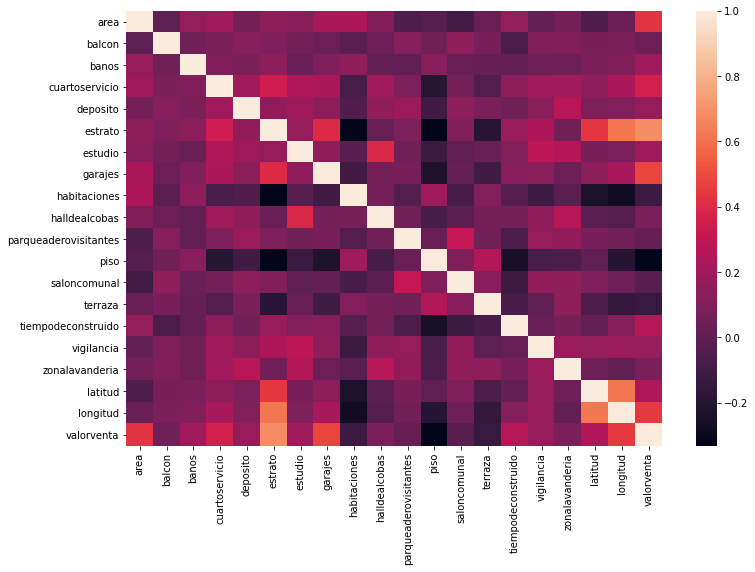

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(corr)

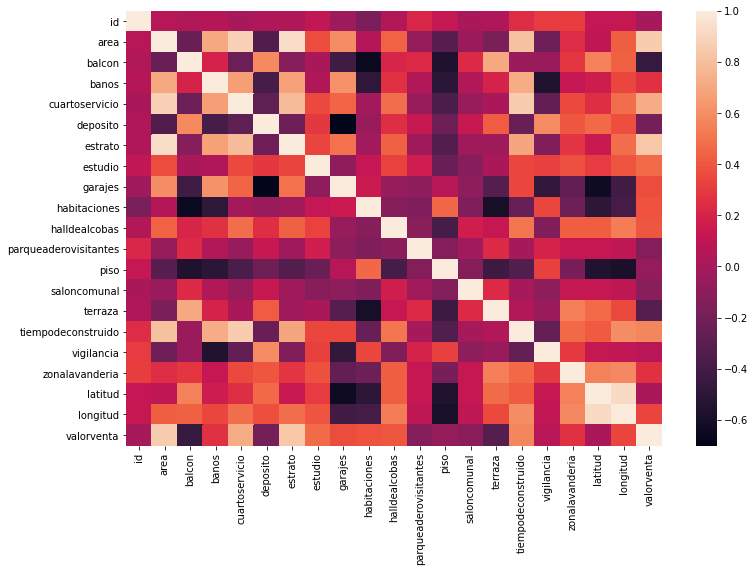

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(corr2)

Notamos que hay diferencia en el resultado de la correlación de las variables.Ejemplo: para el testing el balcon , deposito y parqueadero de visitante tienen relación líneal negativa y en el training esas mismas variables tienen un relación lineal positiva

In [48]:
#Reporte final del training
ProfileReport(train_data, title="EDA Train Data", minimal=True)

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


# 4. Extración de caracteristicas  🔍

## 4.1 División de datos 

> Dividiremos los datos en training para obtener las variables predictoras y la variable de respuesta, que en nuestro caso en particular es el precio de venta.

In [49]:
train_data.piso=train_data.piso.fillna(1)
train_data.dropna(inplace=True)
#Resetiamos el index
train_data.reset_index(inplace=True,drop=True)

In [50]:
#Training
train_x=train_data.iloc[:,0:19].copy()
train_y=train_data.iloc[:,19]



In [51]:
test_x1=data_test.iloc[:,0:20]

In [52]:
#Testing
test_x=data_test.iloc[:,1:20]
test_y=data_test.iloc[:,20]



In [53]:
print(train_x.shape)
print(train_y.shape)

(12074, 19)
(12074,)


##  4.2 kepler mutual information 

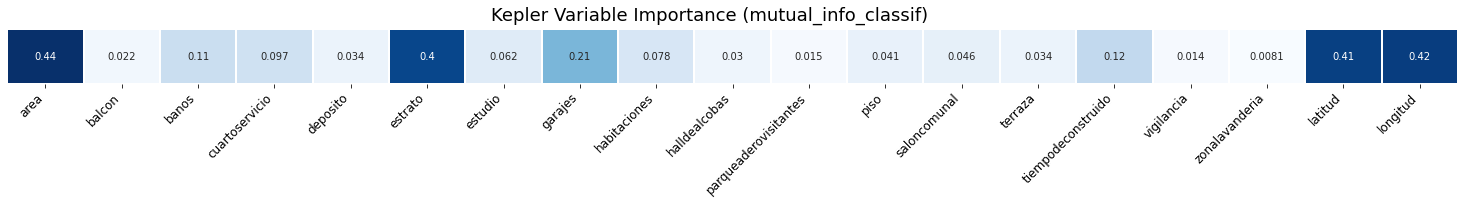

In [54]:

kepler_X=train_x.copy()
kepler_y=train_y.copy()

kepler_mutual_information = mutual_info_regression(kepler_X, kepler_y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(kepler_X.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)
pass

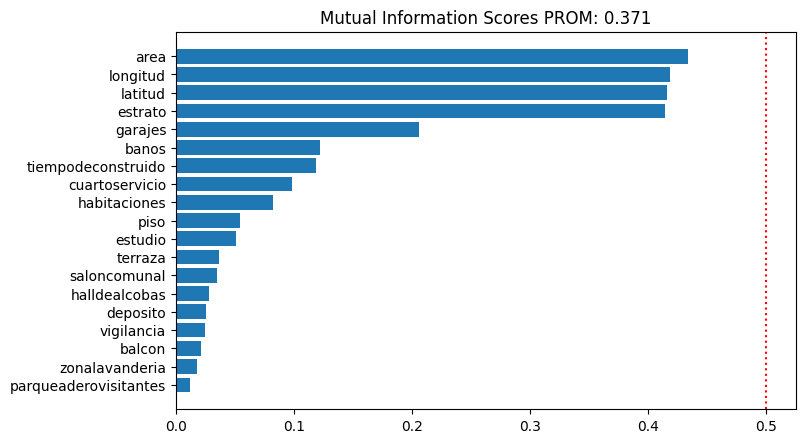

In [55]:
def plot_mi_scores_mutual(X,Y):
  kepler_mutual_information = mutual_info_regression(X, Y)
  scores= pd.Series(kepler_mutual_information, index=X.columns.tolist())
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  
  plt.barh(width, scores)
  plt.axvline(x=0.5, ymin=0, ymax=1, color='r',linestyle='dotted')
  plt.yticks(width, ticks)
  plt.title("Mutual Information Scores PROM: "+str(round(np.sqrt(kepler_mutual_information.mean()),3)))

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores_mutual(kepler_X,kepler_y)


Notamos que variables como estrato, latitud, logintud y area tiene la mayor relación con el precio de ventas. Pobremos otros algoritmos para validar esta afirmación.

##  4.3 Mutual information con Random forest y XGBRegressor 





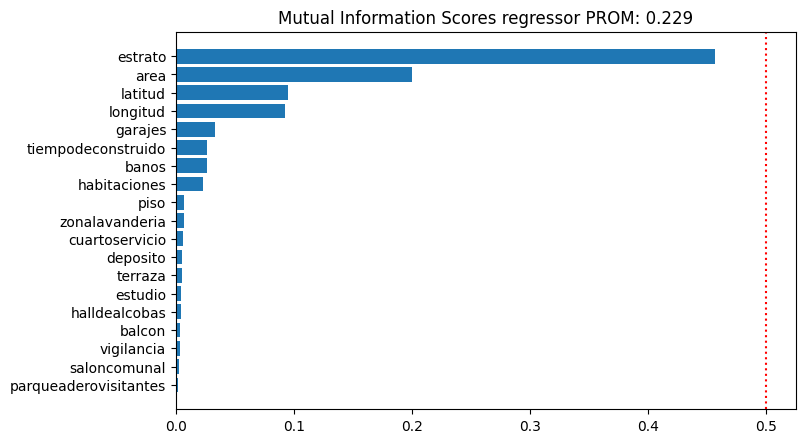

In [56]:
def plot_mi_scores_mutual_regressor(X, y, model=XGBRegressor()):
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    clf=model.fit(X, y)
    score = -1 * score.mean()
    score = np.sqrt(score)
    scores_g= pd.Series(clf.feature_importances_, index=X.columns.tolist())
    scores_g = scores_g.sort_values(ascending=True)
    width = np.arange(len(scores_g))
    ticks = list(scores_g.index)
    plt.barh(width, scores_g)
    plt.axvline(x=0.5, ymin=0, ymax=1, color='r',linestyle='dotted')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores regressor PROM: "+str(round(np.sqrt(scores_g.mean()),3)))
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores_mutual_regressor(train_x,train_y, model=RandomForestRegressor())

Notamos que algnas variables comparten un información muy importante para predecir el rpecio de venta de una casas, tales como: estrato, area, longitud, latitud. Otras dependiente al regressor toman importancias, tal como: garajes, banos, tiempo deconstruido y habitaciones.

#  5. Modelo base  📝

>Este modelo simplemente se configura dividiendo el precio de venta por el area del dataset del testing.

In [57]:
data_test_base=pd.read_csv("test_data.csv")

data_test_base['valormt2_predicted']=data_test_base.valorventa/data_test_base.area
submission1=data_test_base[['id','valormt2_predicted']].copy()
submission1.head()

,id,valormt2_predicted
0,877392,1.778846e+06
1,201483,3.458333e+06
2,188674,3.458333e+06
3,1211067,3.579310e+06
4,883437,3.565517e+06


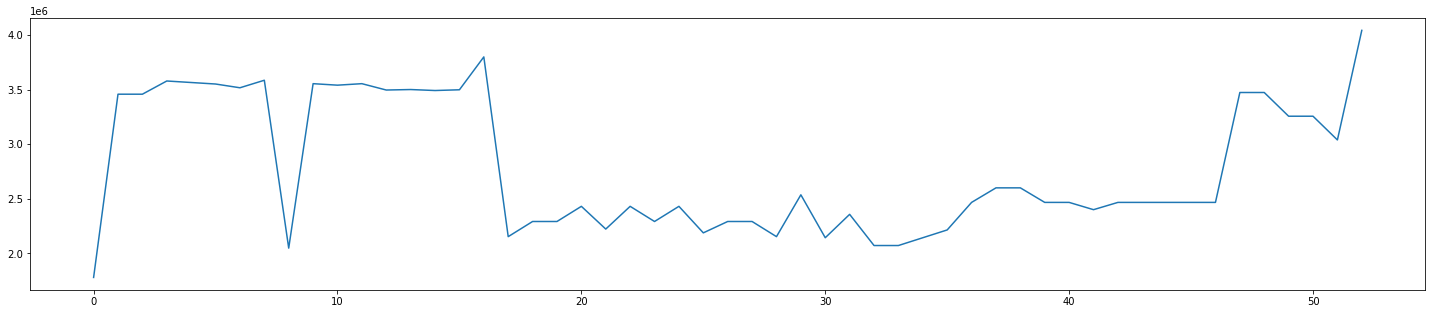

In [58]:
submission1['valormt2_predicted'].plot(kind="line",figsize=(25,5))

#  6. Random forest  📝

## 6.1 Modelo inicial 

Ahora trataremos de ajustar un arbol aleatorio para predecir el precio de venta dado las variables predictoras

In [59]:
from sklearn.ensemble import RandomForestRegressor
clf_rf =RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                             criterion="mse", max_depth=17,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=84, n_jobs=None,
                                             oob_score=False, random_state=280,
                                             verbose=0, warm_start=True)
clf_rf.fit(train_x, train_y)


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=17, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=84, n_jobs=None, oob_score=False,
                      random_state=280, verbose=0, warm_start=True)

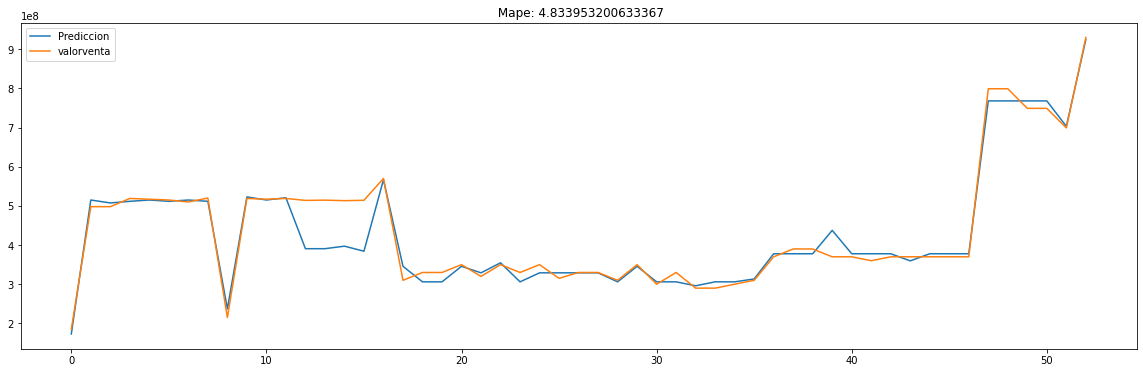

In [60]:
def Plot_prediction(model,test_X,test_Y):
  clf_rf_probas = pd.Series(model.predict(test_x))
  random_pred=pd.concat([clf_rf_probas,test_y],axis=1)
  mape=tf.keras.losses.MAPE(random_pred["valorventa"], random_pred[0])
  random_pred.columns=['Prediccion', 'valorventa']
  random_pred.plot(kind="line",figsize=(20,6))
  plt.title(" Mape: "+ str(np.array(mape)))

Plot_prediction(clf_rf,test_x,test_y)

## 6.2 modelo optimizado 

In [61]:
param_grid = {
    'max_depth': [15, 16,17,18,19, 20, 21,17, None],
    'n_estimators': [80, 84, 85, 86, 90, 95,100, 150],
}
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

-----------------------------------------------------------------------------
Variables utilizadas: ['area' 'banos' 'estrato' 'garajes' 'habitaciones' 'piso'
 'tiempodeconstruido' 'zonalavanderia' 'latitud' 'longitud']
-----------------------------------------------------------------------------
 
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.5min finished


 
-----------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': 15, 'n_estimators': 85}
-----------------------------------------------------------------------------


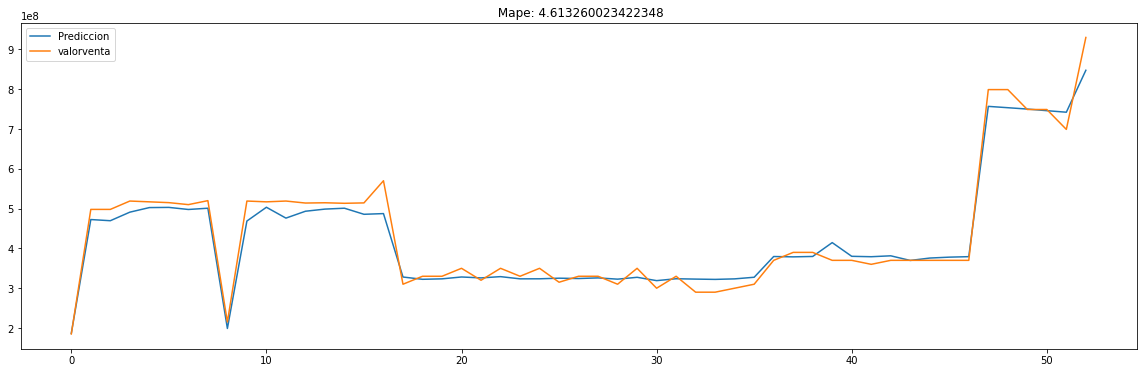

In [62]:
def Rf_selecFromModel(train_X,train_Y,test_X,test_Y):
  model =RandomForestRegressor(random_state=314)
  trans = SelectFromModel(model, threshold='median')
  kepler_X_trans = trans.fit_transform(train_X, train_Y)
  columns_retained_FromMode = train_X.columns[trans.get_support()].values
  print("-----------------------------------------------------------------------------")
  print("Variables utilizadas: "+ str(columns_retained_FromMode))
  print("-----------------------------------------------------------------------------")
  print(' ')
  ftwo_scorer = make_scorer(mean_absolute_percentage_error)
  grid_search = GridSearchCV(estimator = model, scoring=ftwo_scorer,param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
  grid_search.fit(train_X[columns_retained_FromMode.tolist()], train_Y)
  print(' ')
  print("-----------------------------------------------------------------------------")
  print('Best Hyperparameters: %s' % grid_search.best_params_)
  print("-----------------------------------------------------------------------------")
  clf_rf_probas = pd.Series(grid_search.best_estimator_.predict(test_X[columns_retained_FromMode.tolist()]))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  mape=tf.keras.losses.MAPE(random_pred["valorventa"], random_pred[0])
  random_pred.columns=['Prediccion', 'valorventa']
  random_pred.plot(kind="line",figsize=(20,6))
  plt.title(" Mape: "+ str(np.array(mape)))

Rf_selecFromModel(train_x,train_y,test_x,test_y)

-----------------------------------------------------------------------------
Variables utilizadas: ['area' 'banos' 'cuartoservicio' 'estrato' 'garajes' 'habitaciones' 'piso'
 'tiempodeconstruido' 'zonalavanderia' 'latitud' 'longitud']
-----------------------------------------------------------------------------
 
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.7min finished


 
-----------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': 15, 'n_estimators': 84}
-----------------------------------------------------------------------------


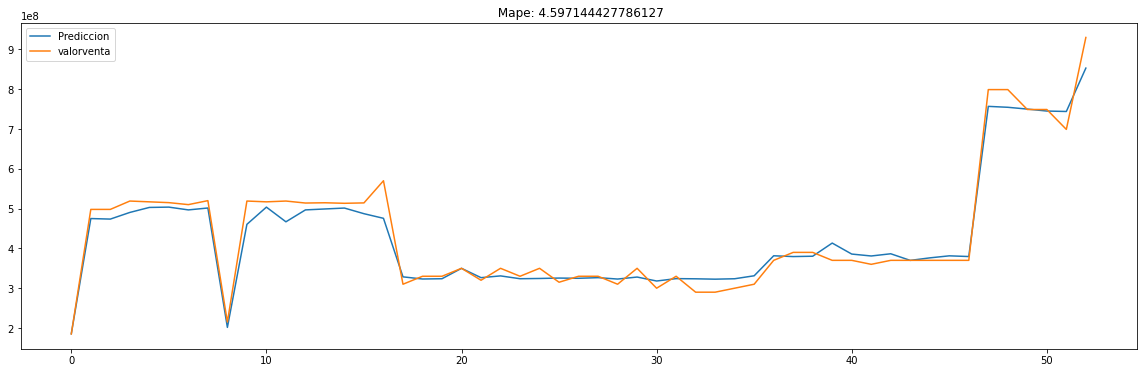

In [63]:
def Rf_RFECV(train_X,train_Y,test_X,test_Y):
  model =RandomForestRegressor(random_state=314)
  trans = RFECV(model)
  kepler_X_trans = trans.fit_transform(train_X, train_Y)
  columns_retained_FromMode = train_X.columns[trans.get_support()].values
  print("-----------------------------------------------------------------------------")
  print("Variables utilizadas: "+ str(columns_retained_FromMode))
  print("-----------------------------------------------------------------------------")
  print(' ')
  ftwo_scorer = make_scorer(mean_absolute_percentage_error)
  grid_search = GridSearchCV(estimator = model, scoring=ftwo_scorer,param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
  grid_search.fit(train_X[columns_retained_FromMode.tolist()], train_Y)
  print(' ')
  print("-----------------------------------------------------------------------------")
  print('Best Hyperparameters: %s' % grid_search.best_params_)
  print("-----------------------------------------------------------------------------")
  clf_rf_probas = pd.Series(grid_search.best_estimator_.predict(test_X[columns_retained_FromMode.tolist()]))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  mape=tf.keras.losses.MAPE(random_pred["valorventa"], random_pred[0])
  random_pred.columns=['Prediccion', 'valorventa']
  random_pred.plot(kind="line",figsize=(20,6))
  plt.title(" Mape: "+ str(np.array(mape)))

Rf_RFECV(train_x,train_y,test_x,test_y)

-----------------------------------------------------------------------------
Variables utilizadas: ['area' 'banos' 'estrato' 'garajes' 'habitaciones' 'tiempodeconstruido'
 'zonalavanderia' 'latitud' 'longitud']
-----------------------------------------------------------------------------
 
Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.1min finished


 
-----------------------------------------------------------------------------
Best Hyperparameters: {'max_depth': 15, 'n_estimators': 90}
-----------------------------------------------------------------------------


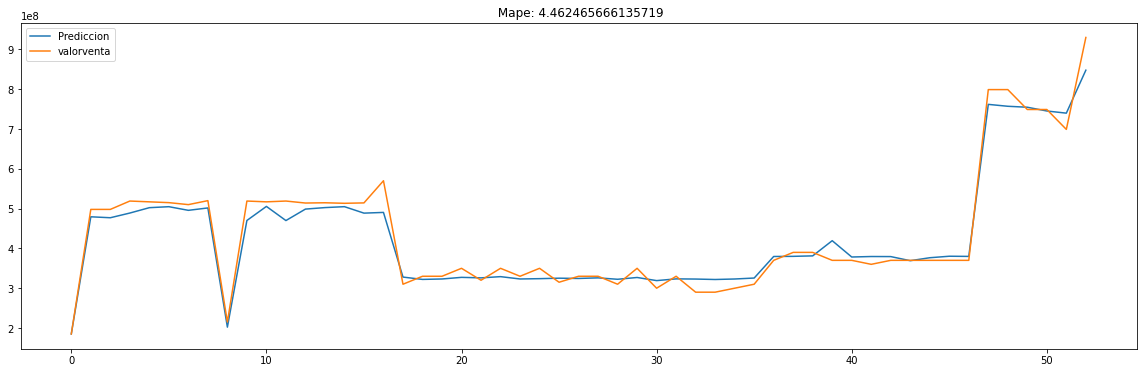

In [64]:
def Rf_RFE(train_X,train_Y,test_X,test_Y):
  model =RandomForestRegressor(random_state=314)
  trans = RFE(model)
  kepler_X_trans = trans.fit_transform(train_X, train_Y)
  columns_retained_FromMode = train_X.columns[trans.get_support()].values
  print("-----------------------------------------------------------------------------")
  print("Variables utilizadas: "+ str(columns_retained_FromMode))
  print("-----------------------------------------------------------------------------")
  print(' ')
  ftwo_scorer = make_scorer(mean_absolute_percentage_error)
  grid_search = GridSearchCV(estimator = model, scoring=ftwo_scorer,param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
  grid_search.fit(train_X[columns_retained_FromMode.tolist()], train_Y)
  print(' ')
  print("-----------------------------------------------------------------------------")
  print('Best Hyperparameters: %s' % grid_search.best_params_)
  print("-----------------------------------------------------------------------------")
  clf_rf_probas = pd.Series(grid_search.best_estimator_.predict(test_X[columns_retained_FromMode.tolist()]))
  random_pred=pd.concat([clf_rf_probas,test_Y],axis=1)
  mape=tf.keras.losses.MAPE(random_pred["valorventa"], random_pred[0])
  random_pred.columns=['Prediccion', 'valorventa']
  random_pred.plot(kind="line",figsize=(20,6))
  plt.title(" Mape: "+ str(np.array(mape)))

Rf_RFE(train_x,train_y,test_x,test_y)

> Notamos que ultizar un random forest otpimizado nos acerca a la respuesta objetivo sin embargo no mejorar la Predicción. Por tal motivo, decidimos utilizar un modelo no supervisado (KNN) para predicir los rpecios promedios de los cluster que pertenecería cada vivienda objetivo.

#  7. Clustering  📝

In [65]:
train_x['valormt2_predicted']=train_y/train_x.area
train_x.head()

,area,balcon,banos,cuartoservicio,deposito,estrato,estudio,garajes,habitaciones,halldealcobas,parqueaderovisitantes,piso,saloncomunal,terraza,tiempodeconstruido,vigilancia,zonalavanderia,latitud,longitud,valormt2_predicted
0,180.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,4.548573,-74.098778,1.444444e+06
1,160.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5,0.0,0.0,4.588108,-74.113998,4.062500e+06
2,127.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8,0.0,1.0,4.600322,-74.145790,2.834646e+06
3,216.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,0.0,4.624079,-74.181145,1.481481e+06
4,111.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4,0.0,0.0,4.601558,-74.071230,8.558559e+05


In [66]:
test_x1['valormt2_predicted']=test_y/test_x1.area
test_x1.head()

,id,area,balcon,banos,cuartoservicio,deposito,estrato,estudio,garajes,habitaciones,halldealcobas,parqueaderovisitantes,piso,saloncomunal,terraza,tiempodeconstruido,vigilancia,zonalavanderia,latitud,longitud,valormt2_predicted
0,877392,104.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,3.0,0.0,0.0,3.0,0.0,1.0,2,0.0,1.0,4.711503,-74.132378,1.778846e+06
1,201483,144.0,0.0,2.0,0.0,1.0,3.0,1.0,1.0,5.0,1.0,0.0,2.0,0.0,0.0,0,1.0,1.0,4.700643,-74.090080,3.458333e+06
2,188674,144.0,0.0,2.0,0.0,0.0,3.0,0.0,1.0,5.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0.0,4.700580,-74.090080,3.458333e+06
3,1211067,145.0,0.0,2.0,0.0,1.0,3.0,1.0,1.0,5.0,1.0,0.0,2.0,0.0,0.0,2,1.0,1.0,4.702525,-74.091370,3.579310e+06
4,883437,145.0,0.0,2.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,0.0,2.0,0.0,0.0,2,1.0,1.0,4.701413,-74.093254,3.565517e+06


In [67]:
train_x["id"]=0
train_x.head()


,area,balcon,banos,cuartoservicio,deposito,estrato,estudio,garajes,habitaciones,halldealcobas,parqueaderovisitantes,piso,saloncomunal,terraza,tiempodeconstruido,vigilancia,zonalavanderia,latitud,longitud,valormt2_predicted,id
0,180.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,4.548573,-74.098778,1.444444e+06,0
1,160.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5,0.0,0.0,4.588108,-74.113998,4.062500e+06,0
2,127.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8,0.0,1.0,4.600322,-74.145790,2.834646e+06,0
3,216.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,0.0,4.624079,-74.181145,1.481481e+06,0
4,111.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4,0.0,0.0,4.601558,-74.071230,8.558559e+05,0


In [68]:
# Filtros de la metodologia
def filtors(treat_pscores,i,control_pscores,fil):
  lalonde_df4 = treat_pscores[treat_pscores["estrato"]==control_pscores["estrato"][i]].copy()  
  lalonde_df4=lalonde_df4[lalonde_df4["area"]>=control_pscores["area"][i]-1]
  lalonde_df4=lalonde_df4[lalonde_df4["area"]<=control_pscores["area"][i]+1] 
  if fil==1:
    lalonde_df4=lalonde_df4[lalonde_df4["habitaciones"]<=control_pscores["habitaciones"][i]+1]
    lalonde_df4=lalonde_df4[lalonde_df4["habitaciones"]>=control_pscores["habitaciones"][i]-1]
  return lalonde_df4

def filtors2(treat_pscores12,i,control_pscores):
  treat_pscores12=treat_pscores12[treat_pscores12["id"]!=control_pscores["id"][i]]
  if len(treat_pscores12[treat_pscores12['tiempodeconstruido']==control_pscores['tiempodeconstruido'][i]])>1:
    treat_pscores12=treat_pscores12[treat_pscores12['tiempodeconstruido']==control_pscores['tiempodeconstruido'][i]]
  while treat_pscores12["valormt2_predicted"].std()>200000:
     treat_pscores12=treat_pscores12[treat_pscores12["valormt2_predicted"]!=treat_pscores12["valormt2_predicted"].min()]
  return treat_pscores12
def cluster_m(V,control_pscores,lalonde_df4):
  knn = neighbors.NearestNeighbors(n_neighbors=V,metric='euclidean')
  knn.fit(lalonde_df4[["latitud","longitud"]],lalonde_df4["trea"])
  distances, indices = knn.kneighbors(pd.DataFrame(control_pscores[["latitud","longitud"]].iloc[i,:]).transpose())
  treat_pscores12 = lalonde_df4.iloc[indices[0,:]]
  return treat_pscores12

In [69]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
import seaborn as sns
# define dataset
model = AffinityPropagation(0.6, verbose=True)
# fit the model
model.fit(test_x[['estrato','latitud','longitud']])
# assign a cluster to each example
yhat = model.predict(test_x[['estrato','latitud','longitud']])
# retrieve unique clusters
clusters = unique(yhat)
clusters

Converged after 78 iterations.


array([0, 1, 2, 3, 4, 5])

In [70]:
#Algoritmo de clustering
MAPE=[]
MAPE3=[]
Clusters=pd.DataFrame()
colormap = cm.LinearColormap(colors=['green', 'red','yellow','blue','black','orange'], vmin=0, vmax=5)
m = folium.Map(location=(4.792324, -74.07414575), zoom_start=12, tiles='openstreetmap')
control_pscores = test_x1.copy()
treat_pscores = pd.concat([train_x,test_x1[['id','area', 'balcon', 'banos', 'cuartoservicio', 'deposito', 'estrato',
       'estudio', 'garajes', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piso', 'saloncomunal', 'terraza',
       'tiempodeconstruido', 'vigilancia', 'zonalavanderia', 'latitud',
       'longitud', 'valormt2_predicted']]],axis=0)
treat_pscores.reset_index(drop=True,inplace=True)
control_pscores.reset_index(drop=True,inplace=True)
control_pscores['trea']=0
treat_pscores['trea']=0
for i in range(len(control_pscores)):
  V=8
  lalonde_df4=filtors(treat_pscores,i,control_pscores,1)
  treat_pscores12=cluster_m(V,control_pscores,lalonde_df4)
  treat_pscores12=filtors2(treat_pscores12,i,control_pscores)

  print(" ")
  print("____________________________________________________________________________")
  print("Casas objetivo: ")
  print(pd.DataFrame(control_pscores[['tiempodeconstruido',"garajes","piso","habitaciones","area","estrato","latitud","longitud","valormt2_predicted"]].iloc[i,:]).transpose())
  if len(treat_pscores12)<2:
        V=17
        lalonde_df4=filtors(treat_pscores,i,control_pscores,0)
        treat_pscores12=cluster_m(V,control_pscores,lalonde_df4)
  
  treat_pscores12["clu"]=i
  Clusters= Clusters.append(pd.DataFrame(treat_pscores12))
  if len(treat_pscores12[treat_pscores12['tiempodeconstruido']==control_pscores['tiempodeconstruido'][i]])>3:
    treat_pscores12=treat_pscores12[treat_pscores12['tiempodeconstruido']==control_pscores['tiempodeconstruido'][i]]
  if control_pscores["estrato"][i]==3:
    descuento=0.975
  elif control_pscores["estrato"][i]==2:
    descuento=0.98
  else:
    descuento=0.96


  if (treat_pscores12["valormt2_predicted"].median()*descuento)>control_pscores["valormt2_predicted"][i]:
    MAPE.append([control_pscores["valormt2_predicted"][i]])
  else:
    MAPE.append([treat_pscores12["valormt2_predicted"].median()*descuento])
  print("---------------------------------------------------------------------------")


  print("Casas vecinas: ")
  print(treat_pscores12[["tiempodeconstruido","garajes","piso",'habitaciones',"area","estrato","latitud","longitud","valormt2_predicted"]])
  print("  ")

  print("  ")
  print("Información estadística:  ")
  print("valor medio de oferta de la casa objetivo seria: "+str(MAPE[i][0]))
  print("valor maximo de oferta de la  casa objetivo seria: "+str(treat_pscores12["valormt2_predicted"].max()))
  print("valor minimo de oferta de la  casa objetivo seria: "+str(treat_pscores12["valormt2_predicted"].min()))
  print("valor mediano de oferta de la  casa objetivo seria: "+str(treat_pscores12["valormt2_predicted"].median()))
  print("valor de desviación de oferta de la  casa objetivo seria: "+str(treat_pscores12["valormt2_predicted"].std()))
  #print("valorporcentaje: "+str(treat_pscores12["valormt2_predicted"].std()/MAPE[i][0]*100*0.08))
  
  
  print("___________________________________________________________________________")
  print("  ")

  treat_pscores12.reset_index(inplace=True,drop=False)
  treat_pscores12["Color"]=yhat[i]
  # control_pscores["Color"]=0
  for j in range(len(treat_pscores12)):
      folium.Circle(
          location=[treat_pscores12['latitud'][j], treat_pscores12['longitud'][j]],
          radius=100,
          fill=True,
          color=colormap(treat_pscores12["Color"][j]),
          fill_opacity=1.5,
          popup="Id_Casa "+str(control_pscores["id"][i])+" Estrato: "+str(treat_pscores12["estrato"][j])
      ).add_to(m)
  folium.Marker(
        location=[control_pscores['latitud'][i], control_pscores['longitud'][i]],
        popup="Id_Casa "+str(control_pscores["id"][i])+" Estrato: "+str(control_pscores["estrato"][i]),
  ).add_to(m)
  m.add_child(colormap)

MAPE=pd.DataFrame(MAPE)
MAPE.columns=["valormt2_predicted"]

 
____________________________________________________________________________
Casas objetivo: 
   tiempodeconstruido  garajes  piso  ...   latitud   longitud  valormt2_predicted
0                 2.0      1.0   3.0  ...  4.711503 -74.132378        1.778846e+06

[1 rows x 9 columns]
---------------------------------------------------------------------------
Casas vecinas: 
      tiempodeconstruido  garajes  ...   longitud  valormt2_predicted
5059                   0      1.0  ... -74.124672        2.761905e+06
4121                   3      1.0  ... -74.124519        2.666667e+06

[2 rows x 9 columns]
  
  
Información estadística:  
valor medio de oferta de la casa objetivo seria: 1778846.1538461538
valor maximo de oferta de la  casa objetivo seria: 2761904.761904762
valor minimo de oferta de la  casa objetivo seria: 2666666.6666666665
valor mediano de oferta de la  casa objetivo seria: 2714285.7142857146
valor de desviación de oferta de la  casa objetivo seria: 67343.50297014765
_____

In [71]:
m

In [72]:
#Submit predicciones finales
random_predFINAL=pd.concat([data_test["id"],MAPE],axis=1)
random_predFINAL.columns=["id","valormt2_predicted"]
random_predFINAL.to_csv("submits/buenos/CLUSTER.csv",index=False)
